In [28]:
print(__doc__)
import warnings
warnings.filterwarnings('ignore')
from time import time

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import numpy as np
import iris
import matplotlib.cm as cm

from sklearn import manifold, datasets, decomposition

mydata = iris.load("./prods_op_mogreps-uk_20130101_03_00_003.nc")
print(mydata)

Automatically created module for IPython interactive environment
0: cloud_area_fraction_assuming_maximum_random_overlap / (1) (time: 4; grid_latitude: 548; grid_longitude: 421)
1: stratiform_snowfall_rate / (kg m-2 s-1) (time: 36; grid_latitude: 548; grid_longitude: 421)
2: wet_bulb_freezing_level_altitude / (m) (time: 3; grid_latitude: 548; grid_longitude: 421)
3: cloud_base_altitude_assuming_only_consider_cloud_area_fraction_greater_than_2p5_oktas / (kft) (time: 4; grid_latitude: 548; grid_longitude: 421)
4: wet_bulb_potential_temperature / (K) (time: 4; pressure: 3; grid_latitude: 548; grid_longitude: 421)
5: air_pressure_at_sea_level / (Pa)    (time: 4; grid_latitude: 548; grid_longitude: 421)
6: air_temperature / (K)               (time: 3; grid_latitude: 548; grid_longitude: 421)
7: air_temperature / (K)               (time: 4; pressure: 2; grid_latitude: 548; grid_longitude: 421)
8: air_temperature / (K)               (time: 4; grid_latitude: 548; grid_longitude: 421)
9: air_tem

(4, 548, 421)
[[101388.125 101385.    101381.75  ...  99619.625  99756.625  99724.125]
 [101385.125 101382.    101378.75  ...  99682.125  99714.     99621.5  ]
 [101382.    101378.75  101375.5   ...  99721.75   99610.625  99526.125]
 ...
 [ 99124.125  99117.75   99111.5   ...  98614.     98616.25   98618.375]
 [ 99120.25   99113.875  99107.5   ...  98609.875  98612.     98614.25 ]
 [ 99116.375  99110.     99103.625 ...  98605.625  98607.875  98610.125]]
(548, 421)
548
standard: 0.65 sec
[[ 0.05975709 -0.02873577]
 [ 0.05853868 -0.0269551 ]
 [ 0.05619454 -0.02367368]
 ...
 [-0.00745804 -0.04492814]
 [-0.00754467 -0.04529226]
 [-0.00746961 -0.04541233]]
(548, 2)
ltsa: 1.3 sec
[[ 0.08125866 -0.04256863]
 [ 0.08031072 -0.0415265 ]
 [ 0.07828502 -0.03947661]
 ...
 [-0.01851712  0.03544105]
 [-0.01852487  0.03548748]
 [-0.01850792  0.03554042]]
(548, 2)
hessian: 1.5 sec
[[-0.08124336  0.04248828]
 [-0.08028519  0.04145322]
 [-0.07826773  0.03940681]
 ...
 [ 0.01851569 -0.03554824]
 [ 0.01853

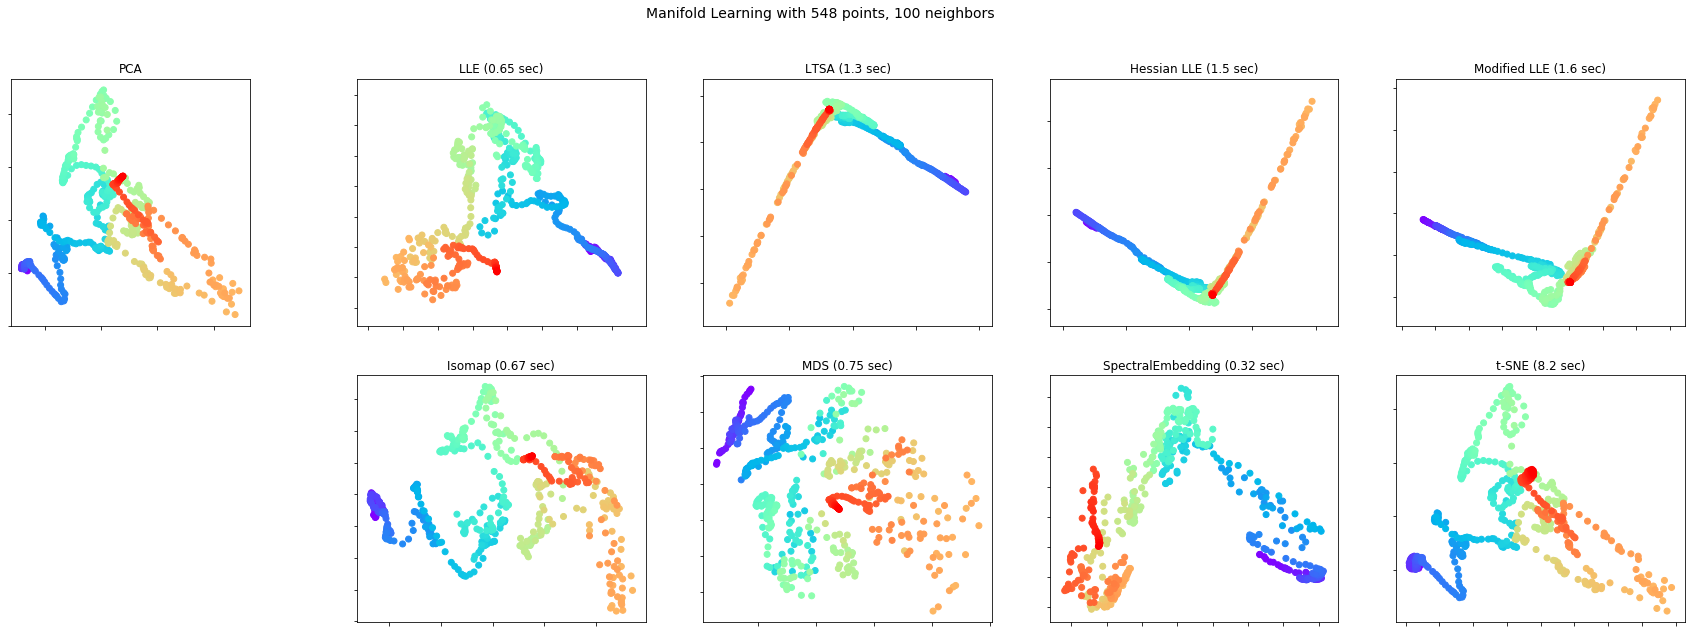

In [29]:
var = mydata.extract('surface_air_pressure')
var = var[0]
# Pay attention. Most of the time the variable var[1] has the shape of (a,b,c), where a, b and c numbers. 
# However, sometimes the variable has the shape of (a,b,c,d), where a,b,c and d are numbers.
# For example, sometimes when we consider 'x_wind' then var[2] has the shape (4,548,421), while others has the shape (4,2,547,421).
# For the latter, we will get a problem since the code is set for the shape of var of the type (a,b,c).
# However, this problem can be easily solved by changing the code accordingly.


X = var.data

n_points = 548
n_neighbors = 100
n_components = 2

fig = plt.figure(figsize=(30, 10))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (n_points, n_neighbors), fontsize=14)
print(X.shape)
W = np.array(X)

WW = W[1]
print(WW)
print(WW.shape)


color = cm.rainbow(np.linspace(0, 1, len(WW)))
print(len(WW))
methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(WW)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))
    print(Y)
    print(Y.shape)
    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
    
t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(WW)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1],  c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight') 

t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(WW)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1],  c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')  

t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(WW)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(Y[:, 0], Y[:, 1],  c=color, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(WW)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1],  c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

pca = decomposition.PCA(n_components=n_components)
pca.fit(WW)
Y = pca.transform(WW)
print(Y.shape)
ax = fig.add_subplot(261)
ax.scatter(Y[:, 0], Y[:, 1], c= cm.rainbow(np.linspace(0, 1, len(WW))), cmap=plt.cm.Spectral)
plt.title("PCA")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()